# Load archive and plot P1D as a function of parameters

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from lace.archive import gadget_archive

### Load Gadget archive

In [2]:
archive = gadget_archive.GadgetArchive(postproc='Pedersen21')

In [3]:
gadget_emu_params=['Delta2_p', 'n_p','mF', 'sigT_Mpc', 'gamma', 'kF_Mpc']
training_data=archive.get_training_data(emu_params=gadget_emu_params)

### Plot linear power parameters for all entries in archive

For a given simulation, the slope ($n_p$) is constant accross redshifts, but the amplitude ($\Delta_p^2$) increases with time.

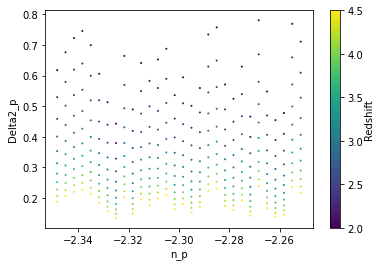

In [4]:
archive.plot_samples('n_p','Delta2_p')

Because all simulations in the emulator have the same background cosmology, the logarithmic growth rate ($f_p$) is only a function of redshift.

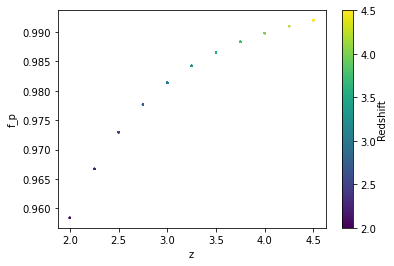

In [5]:
archive.plot_samples('z','f_p')

### Plot IGM parameters for all entries in archive

Mean flux as a function of redshift

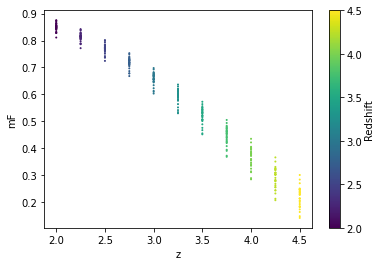

In [6]:
archive.plot_samples('z','mF')

Temperature - density relation described as a power law ($T_0$, $\gamma$)

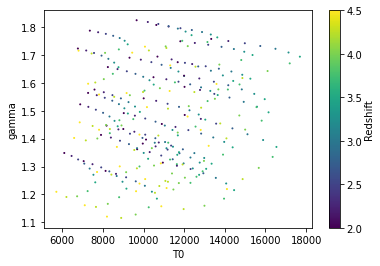

In [7]:
archive.plot_samples('T0','gamma')

Internally, the emulator uses the thermal broadening length ($\sigma_T$, in units of Mpc). Because of the conversion from km/s to Mpc, the relation between $T_0$ and $\sigma_T$ depends on redshift.

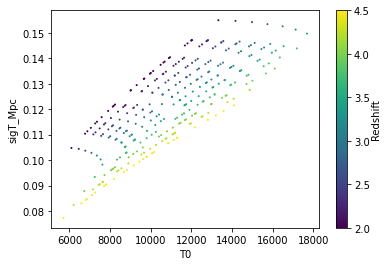

In [8]:
archive.plot_samples('T0','sigT_Mpc')

Gas pressure is parameterised as the filteringh length ($k_F$, in inverse Mpc), and it is also correlated with temperature

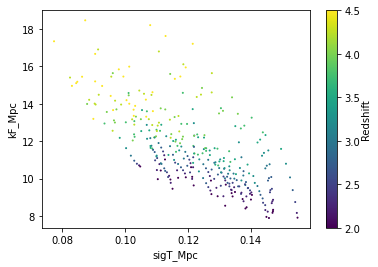

In [9]:
archive.plot_samples('sigT_Mpc','kF_Mpc')